In [16]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# Load data as Pandas DataFrames
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets

In [17]:
# Display variable information
print("\nVariable Information:")
print(drug_consumption_quantified.variables)



Variable Information:
         name     role         type      demographic description units  \
0          id       ID      Integer             None        None  None   
1         age  Feature   Continuous              Age        None  None   
2      gender  Feature   Continuous           Gender        None  None   
3   education  Feature   Continuous  Education Level        None  None   
4     country  Feature   Continuous      Nationality        None  None   
5   ethnicity  Feature   Continuous        Ethnicity        None  None   
6      nscore  Feature   Continuous             None        None  None   
7      escore  Feature   Continuous             None        None  None   
8      oscore  Feature   Continuous             None        None  None   
9      ascore  Feature   Continuous             None        None  None   
10     cscore  Feature   Continuous             None        None  None   
11  impuslive  Feature   Continuous             None        None  None   
12         ss  

In [18]:
# Merge features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# Explore the data
print("\nHead of the Dataset:")
print(df.head())


Head of the Dataset:
       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...  ecstasy  heroin ketamine legalh  lsd meth mushrooms  \
0 -0.91699 -0.00665  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0       CL2   

  ni

In [19]:
# Slight cleaning
df = df.rename(columns={'impuslive': 'impulsive'})

In [20]:
# Statistical summary of features
print("\nStatistical Summary of Features:")
print(df.describe())


Statistical Summary of Features:
              age       gender    education      country    ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.960820     1.907250   

            nscore       escore       oscore       ascore       cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.

In [21]:
# Binary encoding for drug usage
# Define user as somebody who has used a drug at least once in the last year
for col in df.columns[12:]:
    df[col] = df[col].map({'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1})

# Map demographic variables for interpretability
age_mapping = {-0.95197: "18-24", -0.07854: "25-34", 0.49788: "35-44", 1.09449: "45-54", 1.82213: "55-64", 2.59171: "65+"}
gender_mapping = {0.48246: "Female", -0.48246: "Male"}
education_mapping = {
    -2.43591: "Left before 16", -1.73790: "Left at 16", -1.43719: "Left at 17", -1.22751: "Left at 18",
    -0.61113: "Some college", -0.05921: "Professional cert", 0.45468: "University degree",
    1.16365: "Masters degree", 1.98437: "Doctorate"
}

# Create a copy of the data to avoid warnings
dfMapped = df.copy()
# Map the age column and explicitly convert to object
dfMapped['age_mapped'] = df['age'].map(age_mapping)
dfMapped['age_mapped'] = dfMapped['age_mapped'].astype('object')

# Map the gender column
dfMapped['gender_mapped'] = df['gender'].map(gender_mapping)
dfMapped['gender_mapped'] = dfMapped['gender_mapped'].astype('object')

# Map the education column
dfMapped['education_mapped'] = df['education'].map(education_mapping)
dfMapped['education_mapped'] = dfMapped['education_mapped'].astype('object')

# Drop the original columns and rename the new ones if needed
dfMapped.drop(columns=['age', 'gender', 'education'], inplace=True)
dfMapped.rename(columns={'age_mapped': 'age', 'gender_mapped': 'gender', 'education_mapped': 'education'}, inplace=True)



In [22]:
df.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dfMapped.head()

,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss,alcohol,...,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,age,gender,education
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,...,0,0,0,0,0,0,0,35-44,Female,Professional cert
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,...,0,0,1,0,1,0,0,25-34,Male,Doctorate
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,...,0,0,0,0,0,0,0,35-44,Male,Professional cert
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,...,0,0,0,0,0,0,0,18-24,Female,Masters degree
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,...,0,0,0,0,0,0,0,35-44,Female,Doctorate


In [23]:
print(df['cannabis'].unique())  # Replace 'cannabis' with the actual column name if different


[0 1]


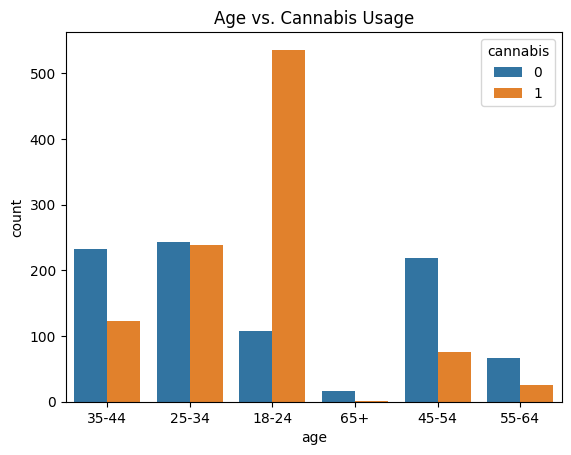

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for age vs. drug usage
sns.countplot(data=dfMapped, x='age', hue='cannabis')  # Replace 'cannabis' with any drug variable
plt.title("Age vs. Cannabis Usage")
plt.show()


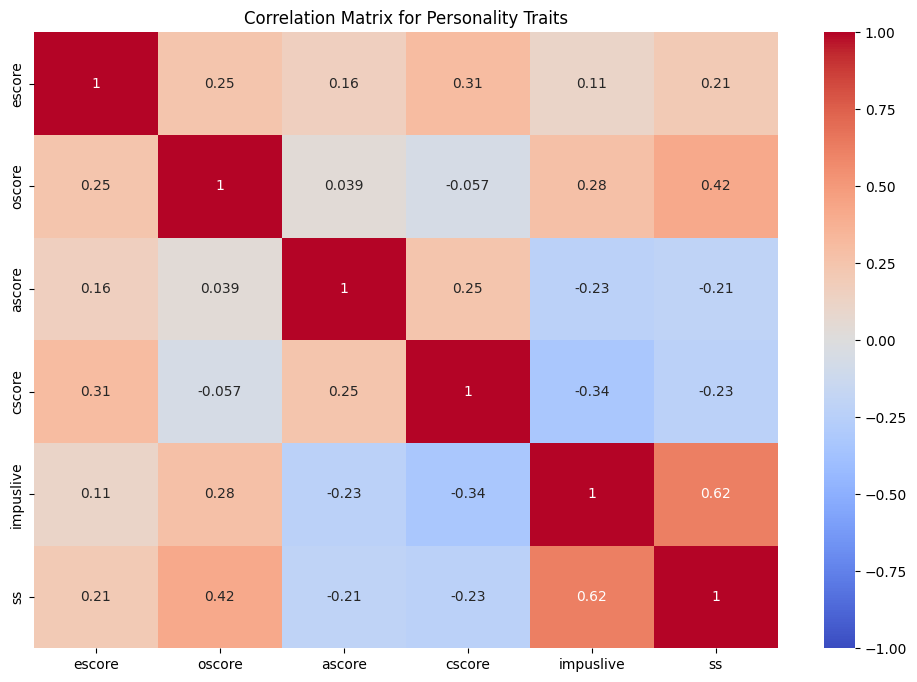

In [29]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(X.iloc[:, 6:12].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Personality Traits")
plt.show()


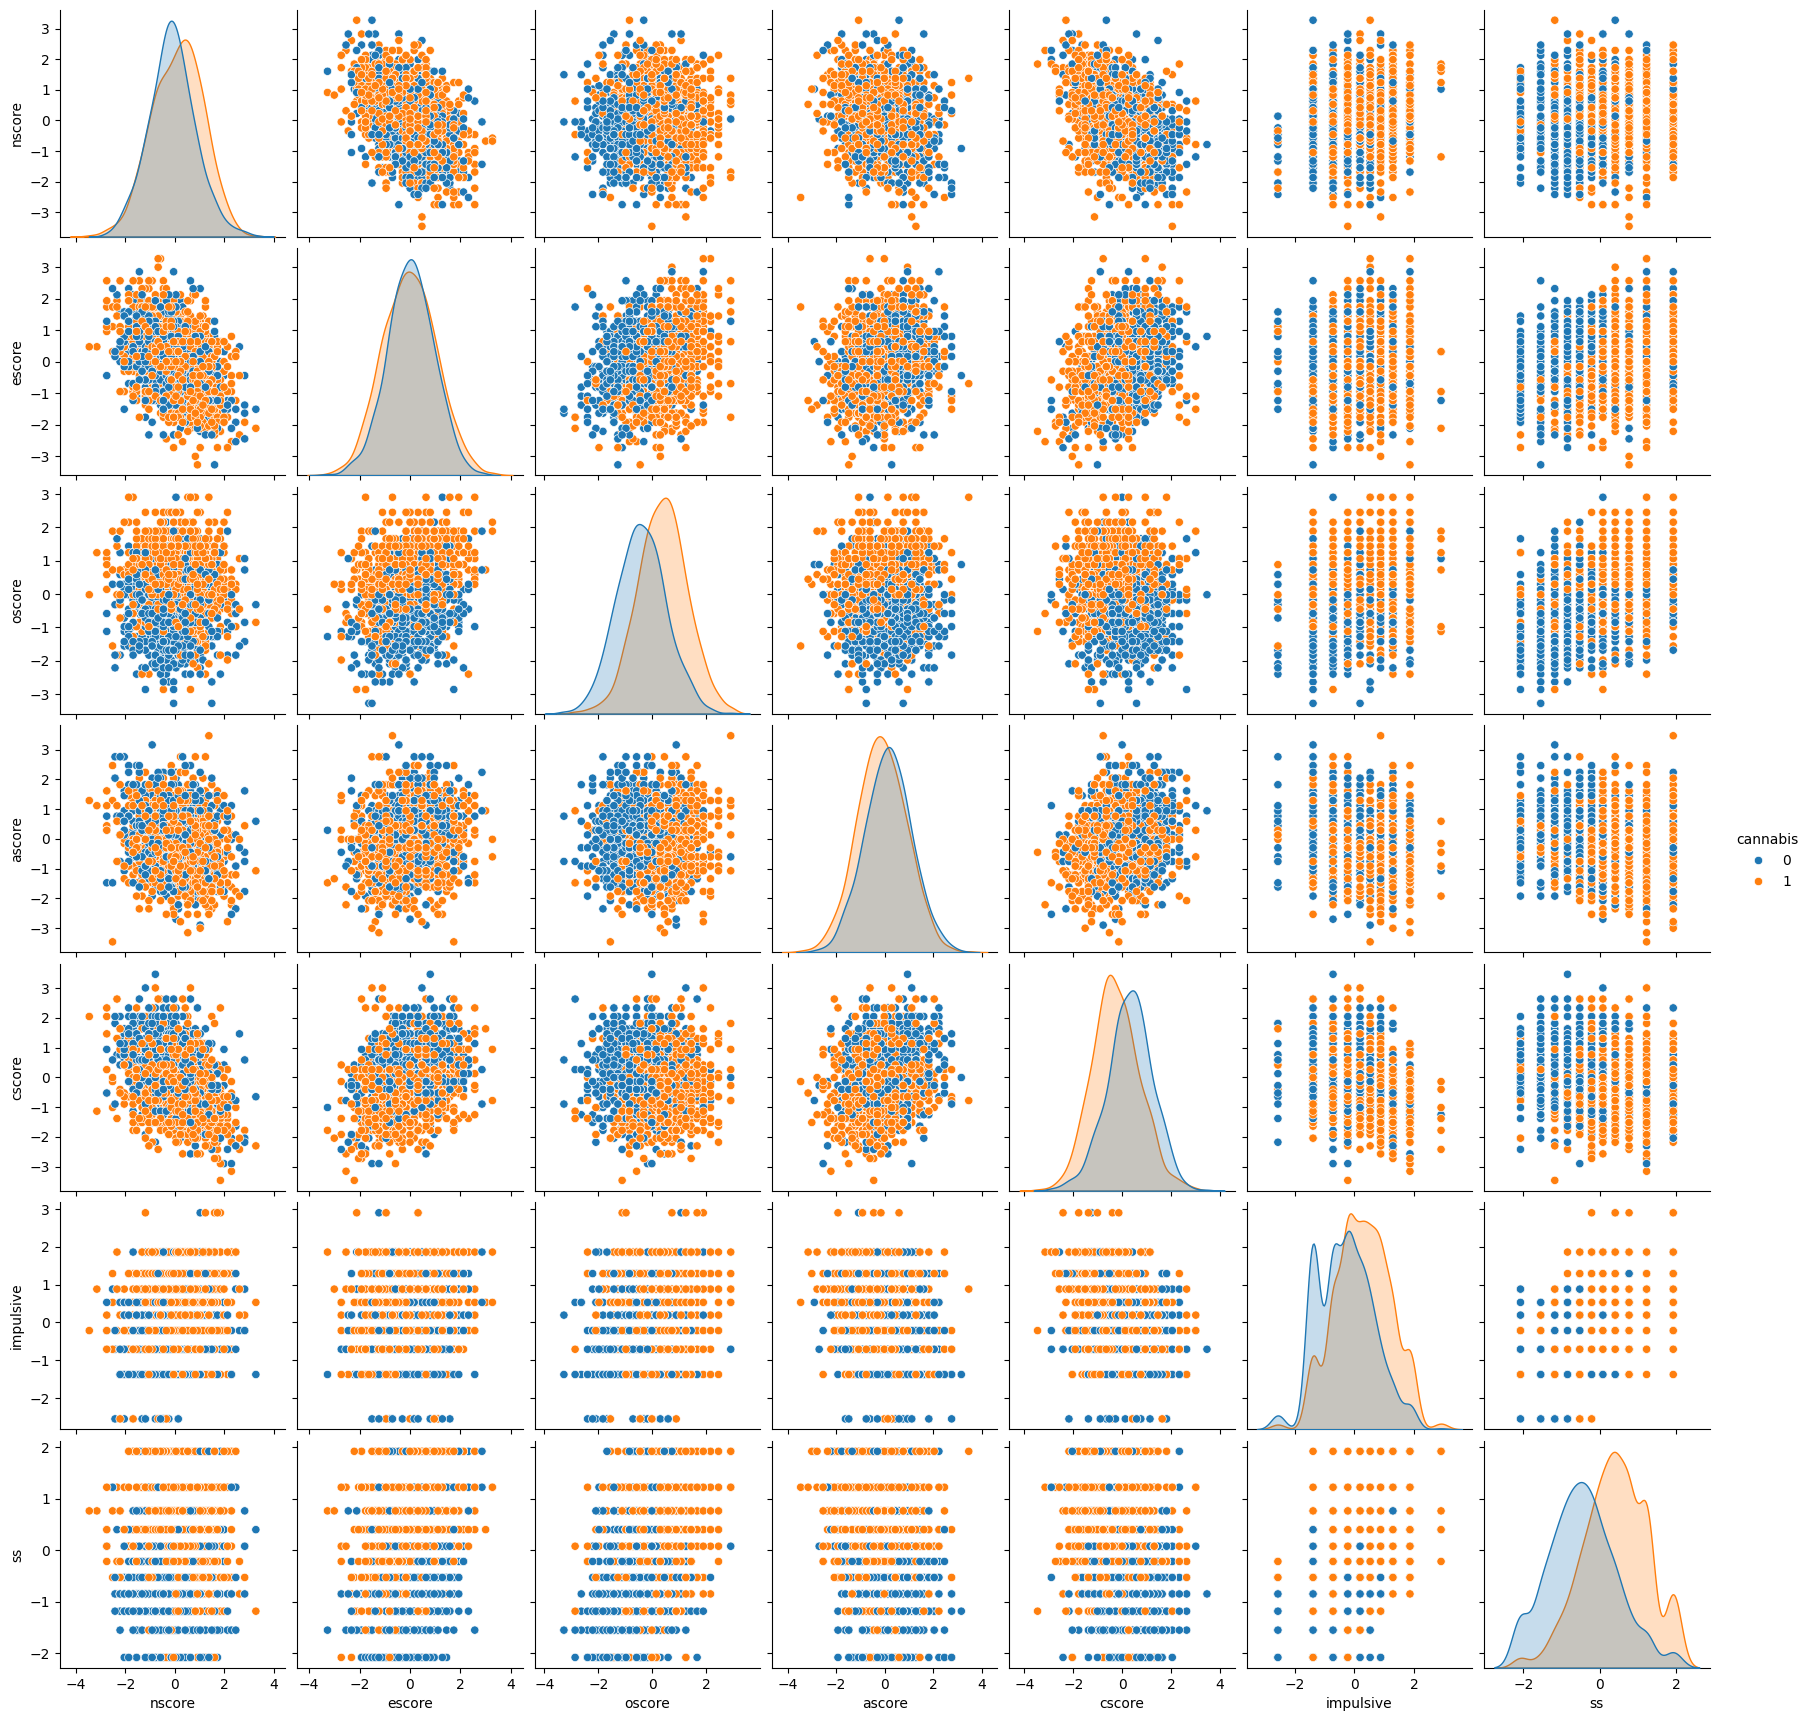

In [31]:
selected_features = ['nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss', 'cannabis']
sns.pairplot(df[selected_features], hue='cannabis', diag_kind='kde')
plt.show()


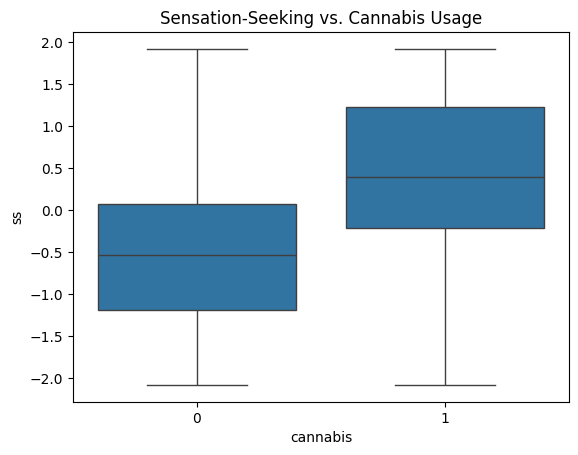

In [32]:
# Box plot for sensation-seeking scores by drug usage
sns.boxplot(data=df, x='cannabis', y='ss')
plt.title("Sensation-Seeking vs. Cannabis Usage")
plt.show()


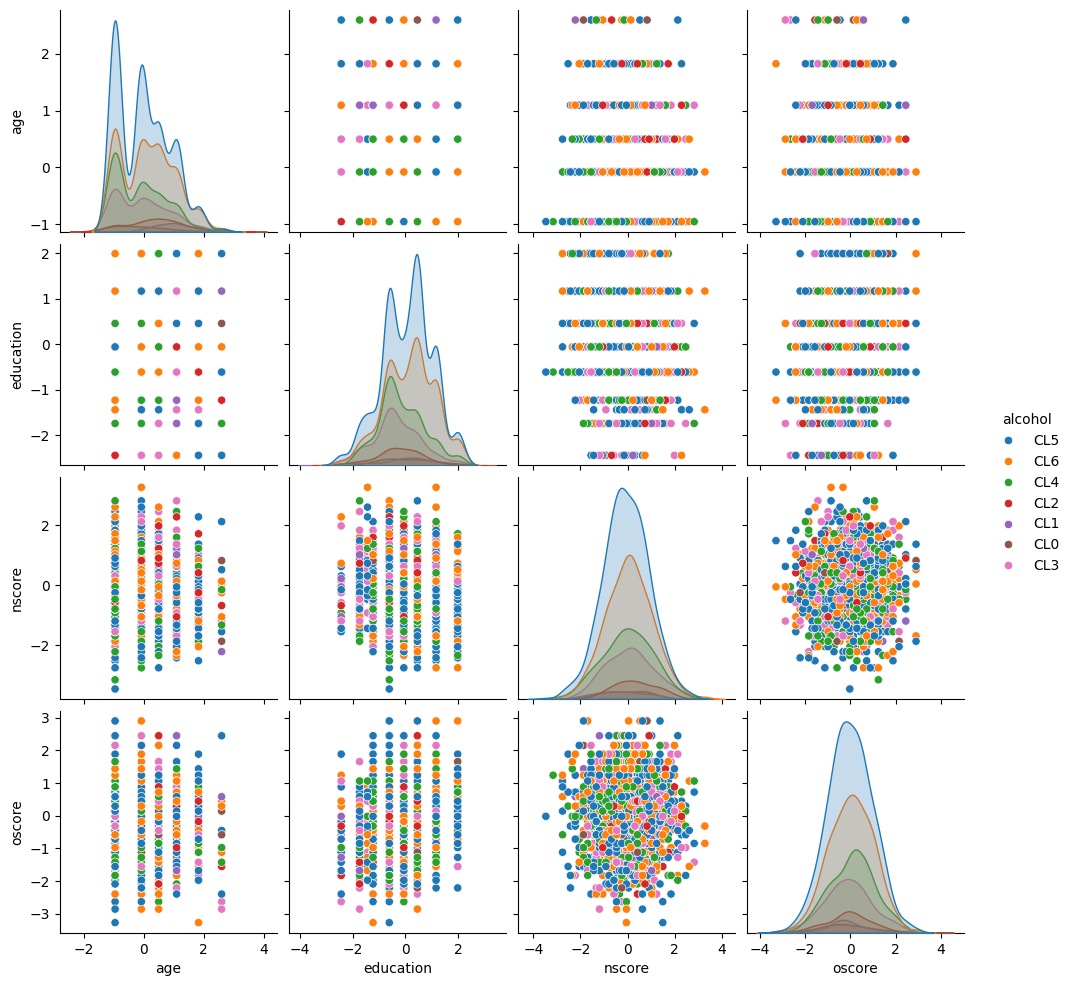

In [ ]:
# Pair Plot
# Including only a few key features for clarity
selected_features = ['age', 'education', 'nscore', 'oscore']
sns.pairplot(data=pd.concat([df[selected_features], y], axis=1), hue=y.columns[0])
plt.show()